<a href="https://colab.research.google.com/github/quuyynh/DSA-460-Final-Project/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import all necessary libraries and packages, load in dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/agaricus-lepiota.data'
df = pd.read_csv(file_path)
print (df.head())

   p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]


## **a. Assign column names and transform data from letters to words**

In [3]:
# Assign column names from the .names file
df.columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

mappings = {
    "class": {'e': 'edible', 'p': 'poisonous'},
    "cap-shape": {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    "cap-surface": {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    "cap-color": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "bruises": {'t': 'bruises', 'f': 'no'},
    "odor": {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment": {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing": {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size": {'b': 'broad', 'n': 'narrow'},
    "gill-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape": {'e': 'enlarging', 't': 'tapering'},
    "stalk-root": {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    "stalk-surface-above-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type": {'p': 'partial', 'u': 'universal'},
    "veil-color": {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number": {'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type": {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population": {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat": {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Apply mapping to each column
for col, mapping in mappings.items():
    df[col] = df[col].replace(mapping)

# Print first 5 rows for verification
print(df.head())

# Save to CSV
df.to_csv("mushrooms_named.csv", index=False)
print("Saved as mushrooms_named.csv")

       class cap-shape cap-surface cap-color  bruises     odor  \
0     edible    convex      smooth    yellow  bruises   almond   
1     edible      bell      smooth     white  bruises    anise   
2  poisonous    convex       scaly     white  bruises  pungent   
3     edible    convex      smooth      gray       no     none   
4     edible    convex       scaly    yellow  bruises   almond   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close     broad      black  ...   
1            free        close     broad      brown  ...   
2            free        close    narrow      brown  ...   
3            free      crowded     broad      black  ...   
4            free        close     broad      brown  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

# **2. Preprocessing**

## **a. Feature selection**

In [4]:
df = pd.read_csv("mushrooms_named.csv")
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [5]:
selected_columns = [  # drop everything else but these
    'class', 'cap-shape', 'bruises', 'odor',
    'gill-size', 'gill-color','stalk-color-above-ring', 'veil-color',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = df[selected_columns].copy()

In [6]:
df.describe()

,class,cap-shape,bruises,odor,gill-size,gill-color,stalk-color-above-ring,veil-color,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,2,9,2,12,9,4,5,9,6,7
top,edible,convex,no,none,broad,buff,white,white,pendant,white,several,woods
freq,4208,3655,4748,3528,5612,1728,4463,7923,3967,2388,4040,3148


## **b. Encode variables**

In [7]:
# Label encode all categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## **c. Split Data**

In [9]:
X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (6498, 11)
Test set size: (1625, 11)


# **3. Classifier**

In [10]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       842
           1       0.99      1.00      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:
[[832  10]
 [  0 783]]


## **a. Cross Validation Accuracy**

In [11]:
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores_dt}")
print(f"Mean CV accuracy: {cv_scores_dt.mean():.4f}")

Cross-validation scores: [0.84307692 0.99323077 0.98646154 1.         0.70012315]
Mean CV accuracy: 0.9046


## **b. Visualization**

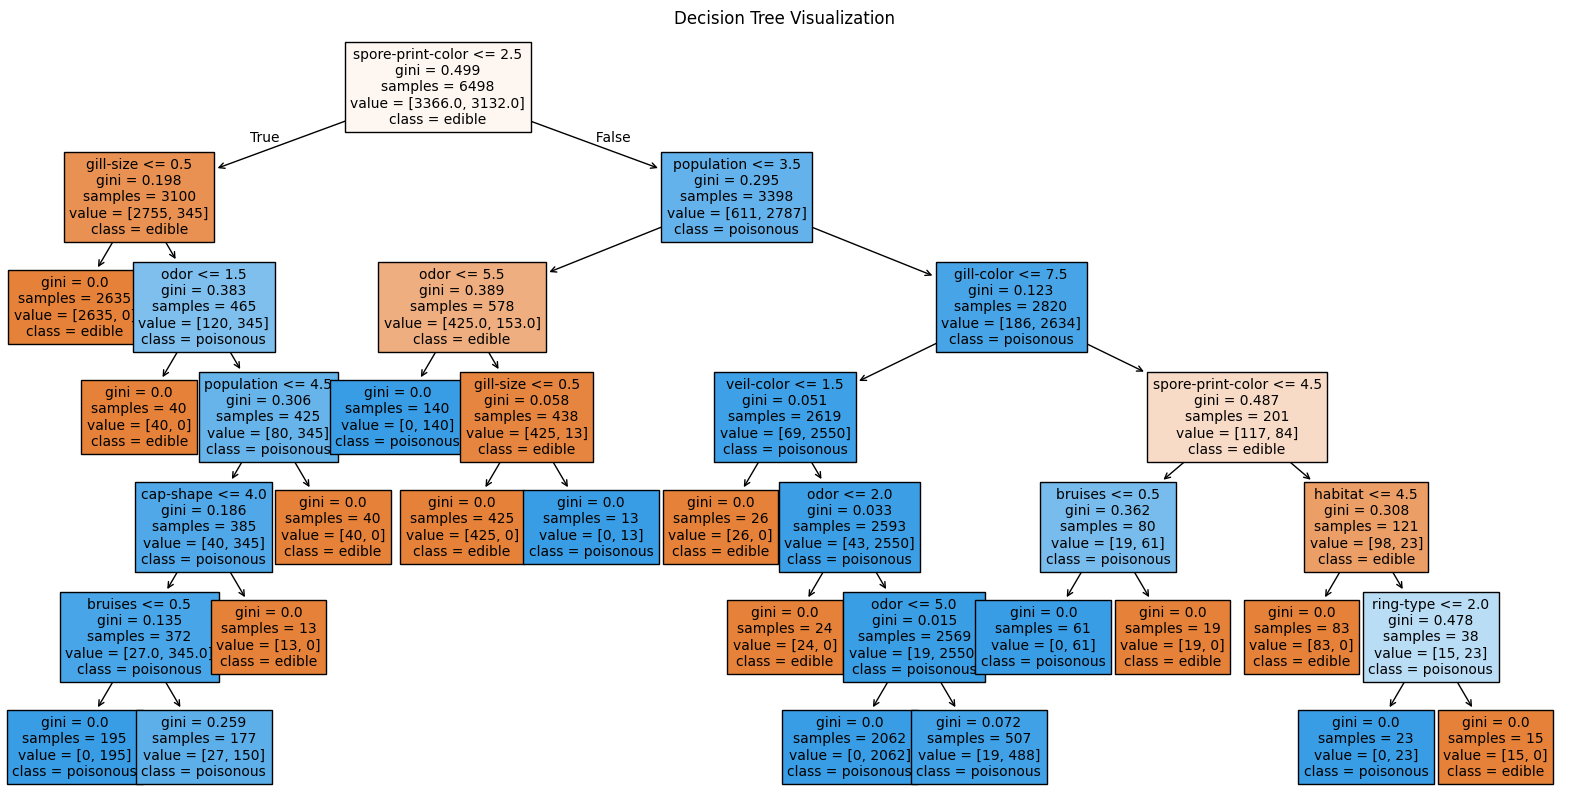

In [12]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# **4. Prune**

In [29]:
#max_depth
for depth in range(2, 10):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Depth: {depth}, Mean CV Accuracy: {scores.mean():.4f}")

Depth: 2, Mean CV Accuracy: 0.9294
Depth: 3, Mean CV Accuracy: 0.9609
Depth: 4, Mean CV Accuracy: 0.9792
Depth: 5, Mean CV Accuracy: 0.9906
Depth: 6, Mean CV Accuracy: 0.9929
Depth: 7, Mean CV Accuracy: 1.0000
Depth: 8, Mean CV Accuracy: 1.0000
Depth: 9, Mean CV Accuracy: 1.0000


In [30]:
clf = DecisionTreeClassifier(
    max_depth=4,              # controls how deep the tree is
    min_samples_split=10,     # node must have at least 10 samples to split
    min_samples_leaf=5,       # each leaf must have at least 5 samples
    ccp_alpha=0.01,           # cost-complexity pruning (prunes based on impurity vs complexity tradeoff)
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [31]:
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       842
           1       0.95      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix:
 [[799  43]
 [ 23 760]]


In [32]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean CV Accuracy after pruning:", scores.mean())

Mean CV Accuracy after pruning: 0.9559857878841713


# **5. Final Fitted Model**

In [33]:
# Get the feature importances from the fitted model
importances = clf.feature_importances_

# Pair feature names with their importances
features = X_train.columns
feature_importance = zip(features, importances)

# Sort features by importance
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Display the sorted features by importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: spore-print-color, Importance: 0.5800
Feature: gill-size, Importance: 0.1549
Feature: population, Importance: 0.1530
Feature: odor, Importance: 0.0711
Feature: gill-color, Importance: 0.0410
Feature: cap-shape, Importance: 0.0000
Feature: bruises, Importance: 0.0000
Feature: stalk-color-above-ring, Importance: 0.0000
Feature: veil-color, Importance: 0.0000
Feature: ring-type, Importance: 0.0000
Feature: habitat, Importance: 0.0000
